In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
#Set all the constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Flowers",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 4317 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names

In [6]:
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
len(dataset)

135

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[4 4 1 1 4 0 1 4 3 2 0 1 4 1 4 4 2 1 0 0 1 0 2 3 4 4 1 1 4 0 3 4]


0 ---> Daisy<br>1 ---> Dandelion<br>2 ---> Rose<br>3 --->Sunflower<br>4 ---> Tulip

In [9]:
# First image
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


## Visualize some of the images

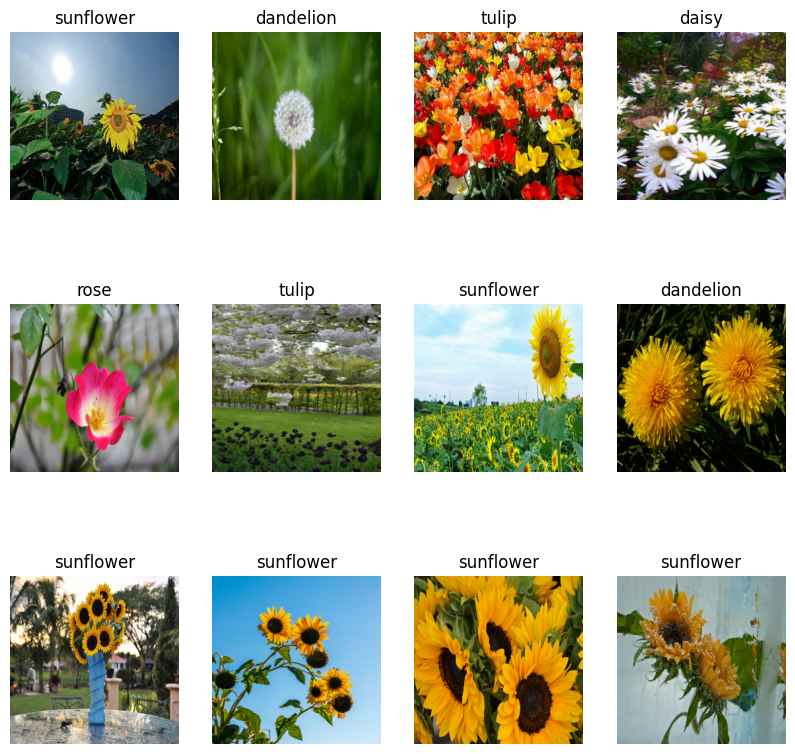

In [23]:

plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [24]:
len(dataset)

135

80% ==> Training<br>
20% ==> 10% validation,10% test

In [25]:
train_size = 0.8
len(dataset)*train_size

108.0

In [29]:
#Taking first 108 as training dataset

In [33]:
train_ds = dataset.take(108)
len(train_ds)

108

In [34]:
#Skipping first 108 and getting the remaining
test_ds = dataset.skip(108)
len(test_ds)

27

In [35]:
val_size = 0.1
len(dataset)*val_size

13.5

In [36]:
val_ds = test_ds.take(13)
len(val_ds)

13

In [37]:
test_ds = test_ds.skip(13)
len(test_ds)

14

In [38]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split=0.1,shuffle=True,shuffle_size = 1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed =12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)

    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds,val_ds,test_ds

In [39]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [40]:
len(train_ds)

108

In [44]:
len(val_ds)

13

In [42]:
len(test_ds)

14

In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:

#resize_and_rescale layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [46]:
#data_augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
  
])

In [50]:
#Trying to use 32 convolutional 2D layers
#Convolutional layer, pooling layer,convolutional layer like wise contiu
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\nirasha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,877 (718.27 KB)

 Trainable params: 183,877 (718.27 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [55]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 99s 726ms/step - accuracy: 0.2983 - loss: 1.5195 - val_accuracy: 0.5337 - val_loss: 1.1576
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 92s 855ms/step - accuracy: 0.5082 - loss: 1.1483 - val_accuracy: 0.5721 - val_loss: 1.0461
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 96s 894ms/step - accuracy: 0.5491 - loss: 1.0616 - val_accuracy: 0.6346 - val_loss: 0.9824
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 88s 818ms/step - accuracy: 0.6092 - loss: 0.9880 - val_accuracy: 0.6466 - val_loss: 0.9191
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 89s 826ms/step - accuracy: 0.6144 - loss: 0.9624 - val_accuracy: 0.6418 - val_loss: 0.8931
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 100s 926ms/step - accuracy: 0.6453 - loss: 0.8885 - val_accuracy: 0.6707 - val_loss: 0.8473
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 91s 847ms/step - accuracy: 0.6444 - loss: 0.8840 - val_accuracy: 0.7236 - val_loss: 0.7497
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 743ms/step - accuracy: 0.6697 - loss: 

In [56]:
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.8653 - loss: 0.3780


In [57]:
scores

[0.385903537273407, 0.859375]

In [58]:
history

In [59]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 108}

In [60]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [61]:
history.history['accuracy']


[0.36660879850387573,
 0.5277777910232544,
 0.5685763955116272,
 0.6099537014961243,
 0.6310763955116272,
 0.6394675970077515,
 0.6495949029922485,
 0.6701388955116272,
 0.6736111044883728,
 0.6843171119689941,
 0.6927083134651184,
 0.7048611044883728,
 0.7034143805503845,
 0.7201967835426331,
 0.7149884104728699,
 0.7329282164573669,
 0.7329282164573669,
 0.7358217835426331,
 0.7459490895271301,
 0.7369791865348816,
 0.7598379850387573,
 0.7647569179534912,
 0.7630208134651184,
 0.7543402910232544,
 0.7662037014961243,
 0.7861689925193787,
 0.7829861044883728,
 0.7965856194496155,
 0.7922453880310059,
 0.7928240895271301,
 0.7893518805503845,
 0.8035300970077515,
 0.8058449029922485,
 0.8072916865348816,
 0.8032407164573669,
 0.8107638955116272,
 0.8012152910232544,
 0.8200231194496155,
 0.8289930820465088,
 0.8223379850387573,
 0.8142361044883728,
 0.8203125,
 0.8234953880310059,
 0.8203125,
 0.8420138955116272,
 0.8298611044883728,
 0.8370949029922485,
 0.8379629850387573,
 0.836516

In [62]:
len(history.history['accuracy'])

50

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

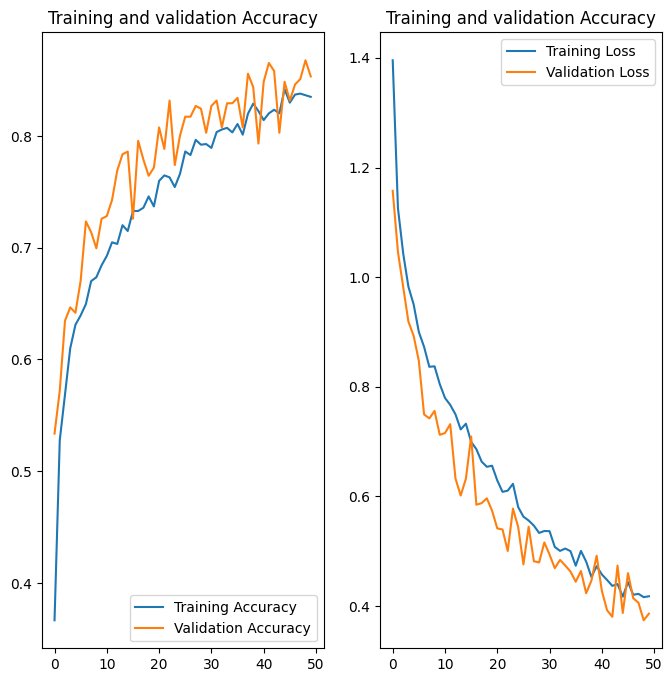

In [64]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.title('Training and validation Accuracy')
plt.legend(loc='upper right')
plt.show()

First image to predict
First image's actual label:  dandelion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Predicted label:  dandelion


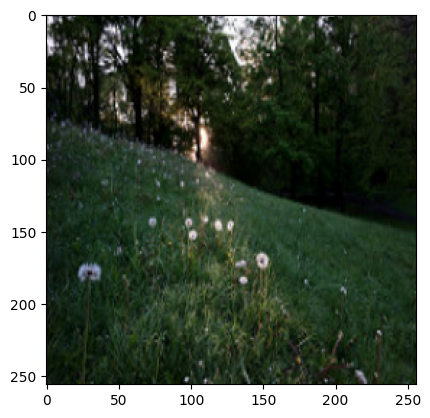

In [66]:
import numpy as np

for images_batch,labels_batch in test_ds.take(1):

    first_image =images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label: ", class_names[np.argmax(batch_prediction[0])])
 



In [67]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


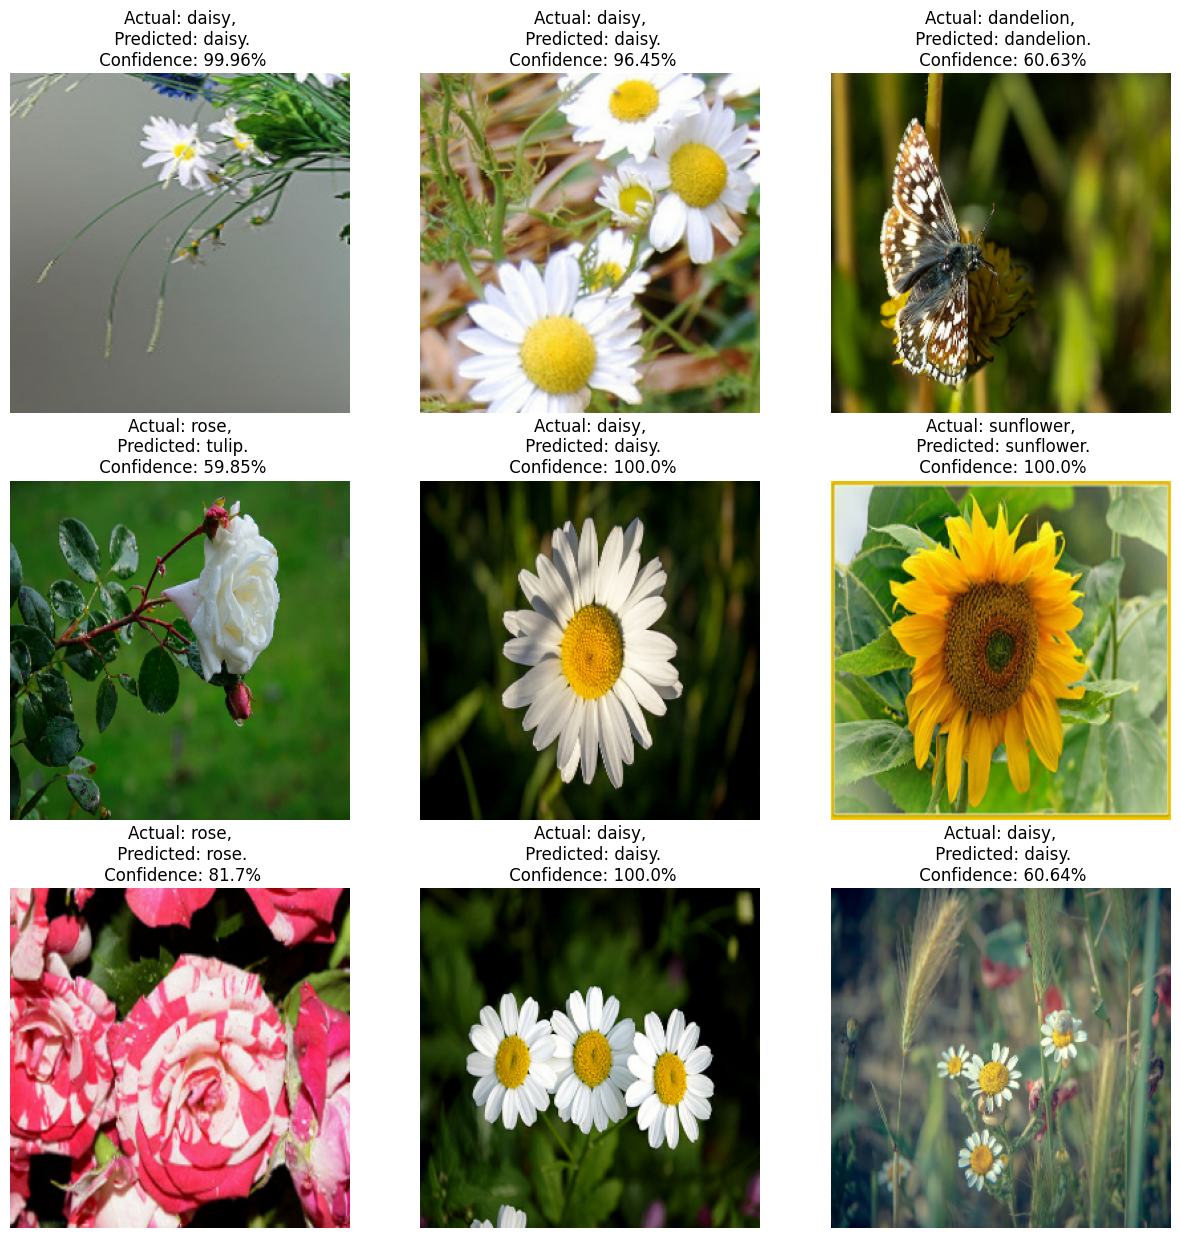

In [70]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [77]:
import os
import re

# Define the directory to save models
model_dir = "../models"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Extract numeric versions from existing filenames
existing_versions = [int(re.search(r'(\d+)', f).group()) for f in os.listdir(model_dir) if re.search(r'(\d+)', f)]

# Determine the new model version
model_version = max(existing_versions + [0]) + 1

# Save the model in the native Keras format
model.save(f"{model_dir}/model_{model_version}.keras")

